# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Preparing Dataset

In [2]:
x, y = make_moons(1000,noise=0.25)

In [3]:
train, test, train_y, test_y = train_test_split(x,y,test_size = 0.2)

# Visualization of Training and Test Set

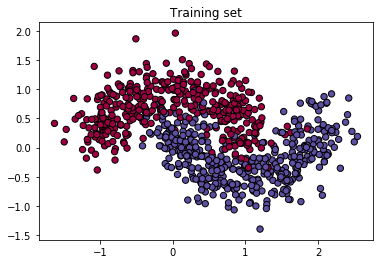

In [10]:
plt.scatter(train[:, 0], train[:, 1], c=train_y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.title('Training set')
plt.show()

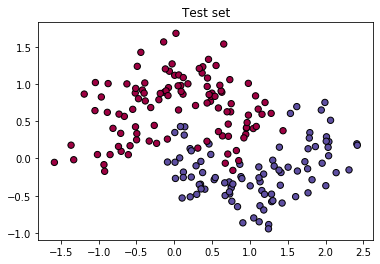

In [11]:
plt.scatter(test[:, 0], test[:, 1], c=test_y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.title('Test set')
plt.show()

# Building your own neural network for classification

In [6]:
ninput = 2 #Since we are dealing with dataset with 2 features only
first_layer_neurons = 3
second_layer_neurons = 4
third_layer_neurons = 3
fourth_layer_neurons = 2
noutput = 1 # we classify moons as red or blue

In [7]:
W_1 = np.random.rand(first_layer_neurons,ninput)
B_1 = np.random.rand(first_layer_neurons,1)

W_2 = np.random.rand(second_layer_neurons,first_layer_neurons)
B_2 = np.random.rand(second_layer_neurons,1)

W_3 = np.random.rand(third_layer_neurons,second_layer_neurons)
B_3 = np.random.rand(third_layer_neurons,1)

W_4 = np.random.rand(fourth_layer_neurons,third_layer_neurons)
B_4 = np.random.rand(fourth_layer_neurons,1)

W_5 = np.random.rand(noutput,fourth_layer_neurons)
B_5 = np.random.rand(noutput,1)

In [8]:
print(W_1.shape,W_2.shape,W_3.shape,W_4.shape,W_5.shape,B_1.shape,B_2.shape,B_3.shape,B_4.shape,B_5.shape,)

(3, 2) (4, 3) (3, 4) (2, 3) (1, 2) (3, 1) (4, 1) (3, 1) (2, 1) (1, 1)


In [9]:
6+12+12+6+2+3+4+3+2+1

51

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-1 * x))
    

# Defining forward pass for Neural Network
    We use sigmoid as activation function

In [11]:
def forwardpass(train,W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5):
    a_1 = W_1.dot(train.T) + B_1
    z_1 = sigmoid(a_1)
    
    a_2 = W_2.dot(z_1) + B_2
    z_2 = sigmoid(a_2)
    
    a_3 = W_3.dot(z_2) + B_3
    z_3 = sigmoid(a_3)
    
    a_4 = W_4.dot(z_3) + B_4
    z_4 = sigmoid(a_4)
    
    a_5 = W_5.dot(z_4) + B_5
    z_5 = sigmoid(a_5)
    
    return z_5

In [12]:
def loss(Y,train_y):#defining loss function 
    return ( -1 * (1/train_y.shape[0]) * ( train_y * np.log(Y) + (1-train_y) * np.log(1 - Y) ) ).sum()

In [13]:
def cmp(a,b,option):
    if option.lower() == 'greater' and (a > b):
        return True      
    elif option.lower() == 'lesser' and (a < b):
        return True
    
    return False

In [14]:
def updatew_s(swarm): #takes particle to calculate weights 1xD
    for i in range(swarm.shape[0]):
            
        W_1s = swarm[i][0:6].reshape(3,2)
        W_2s = swarm[i][6:18].reshape(4,3)
        W_3s = swarm[i][18:30].reshape(3,4)
        W_4s = swarm[i][30:36].reshape(2,3)
        W_5s = swarm[i][36:38].reshape(1,2)
    
        B_1s = swarm[i][38:41].reshape(3,1)
        B_2s = swarm[i][41:45].reshape(4,1)
        B_3s = swarm[i][45:48].reshape(3,1)
        B_4s = swarm[i][48:50].reshape(2,1)
        B_5s = swarm[i][50:51].reshape(1,1)
    
    return W_1s,W_2s,W_3s,W_4s,W_5s,B_1s,B_2s,B_3s,B_4s,B_5s

In [15]:
def accuracy(gbest,train_set, y_train_set, test_set, y_test_set):
    W_1t,W_2t,W_3t,W_4t,W_5t,B_1t,B_2t,B_3t,B_4t,B_5t = updatew_s(gbest.reshape(1,gbest.shape[0]))
    
    yhat_train = forwardpass(train_set,W_1t,W_2t,W_3t,W_4t,W_5t,B_1t,B_2t,B_3t,B_4t,B_5t)
    train_loss = loss(yhat_train,y_train_set)
    
    yhat_test = forwardpass(test_set,W_1t,W_2t,W_3t,W_4t,W_5t,B_1t,B_2t,B_3t,B_4t,B_5t)
    test_loss = loss(yhat_test,y_test_set)
    
    yhat_train[yhat_train > 0.5] = 1
    yhat_test[yhat_test > 0.5] = 1
    
    train_acc = (len(train_set) - np.abs(yhat_train - y_train_set).sum())/len(train_set)
    test_acc = (len(test_set) - np.abs(yhat_test - y_test_set).sum())/len(test_set)
    
    return train_acc,train_loss,test_acc,test_loss

In [16]:
Y = forwardpass(train,W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5)
loss(Y,train_y)

0.8719328226127598

In [17]:
Y_test = forwardpass(test,W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5)
loss(Y_test,test_y)

0.9033460010452795

In [18]:
def fx(swarm): #calculates 
    z_swarm = []
    for i in range(swarm.shape[0]):
        W_1s = swarm[i][0:6].reshape(3,2)
        W_2s = swarm[i][6:18].reshape(4,3)
        W_3s = swarm[i][18:30].reshape(3,4)
        W_4s = swarm[i][30:36].reshape(2,3)
        W_5s = swarm[i][36:38].reshape(1,2)
    
        B_1s = swarm[i][38:41].reshape(3,1)
        B_2s = swarm[i][41:45].reshape(4,1)
        B_3s = swarm[i][45:48].reshape(3,1)
        B_4s = swarm[i][48:50].reshape(2,1)
        B_5s = swarm[i][50:51].reshape(1,1)
        
        temp_y = forwardpass(train,W_1s,W_2s,W_3s,W_4s,W_5s,B_1s,B_2s,B_3s,B_4s,B_5s)
        #print(temp_y)
        #print(temp_y.max())
        ll = loss(temp_y,train_y)
        z_swarm.append(ll)
        
    return np.array(z_swarm)

# Initializing parameters 

In [19]:
nswarm = 800 #no of swarm particles
dim = 51 #dimen of each swarm particle, since we are finding weights for our NN hence its 51 no of parameters to optimise
n_intr = 150 #no of iterations
option = 'lesser'

pos = (np.random.rand(nswarm,dim) - 0.5) * 12
v = (np.random.rand(nswarm,dim) -0.5 )
r1 = np.random.rand(nswarm,dim) * 0.5
r2 = np.random.rand(nswarm,dim) * 0.5
lbestvalues = np.ones((nswarm,dim)) * np.inf
if option == 'greater':
    lbestvalues = -1 * lbestvalues
    
gbestvalue = lbestvalues.min()
gbest = np.ones((1,dim)) * np.inf
if option == 'greater':
    gbest = -1 * gbest
lbest = pos

# Putting everything together and running the optimisation

In [20]:
alpha = 0.9
c1 = 1
c2 = 2
#r1 = 0.3
#r2 = 0.5
tr_acc = []
tst_acc = []
tr_loss = []
tst_loss = []
for i in range(n_intr):
    
    z_pos = fx(pos)
    z_lbest = fx(lbest)
    
    for k in range(nswarm):
        if cmp(z_pos[k],z_lbest[k],option):
            #print("Entered")
            lbest[k] = pos[k]
                
    lbestvalue = fx(lbest)
    
    if option == 'lesser':
        lm = lbestvalue.min()
        la = lbestvalue.argmin()
    else:
        lm = lbestvalue.max()
        la = lbestvalue.argmax()
    #if (lbestvalue.min()< gbestvalue):
    if cmp(lm, gbestvalue, option):
        gbestvalue = lm
        gbest = lbest[la]
        print(gbestvalue)
    
    train_acc,train_loss,test_acc,test_loss = accuracy(gbest,train,train_y,test,test_y)
    tr_acc.append(train_acc)
    tr_loss.append(train_loss)
    
    tst_acc.append(test_acc)
    tst_loss.append(test_loss)
    
    v = alpha * v + c1 * r1 * (lbest - pos) + c2 * r2 * (gbest - pos)
    
    pos = pos + v
    

0.45244218596386476
0.44478051369532723
0.41844511332121237
0.4130766459939369
0.37039798619541464
0.3284396509291286
0.30025204785976545
0.28459188791539336
0.24062822769923736
0.2367916575332891
0.2081501173771197
0.1977319090683136
0.19745134784815144
0.19631583907727546
0.18354392886802284
0.17818487451842221
0.176161855618602
0.17067975016106862
0.16996536111744215
0.16876840075455973
0.1654275440622066
0.16184564856105138
0.159868883368679
0.157684538433997
0.1574364784301914
0.1570853470535142
0.1565917405654677
0.15649889340954531
0.15590914509835507
0.15590758262376397
0.1558481877403466
0.15545528274217213
0.1553829118571597
0.1552539448881899
0.15512034016890408
0.15496219533766492
0.1545332096665487
0.1543270551761133
0.15412620922131134
0.15383220443947793
0.15375423910081606
0.15373837032790927
0.15330296341273913
0.15329259501481907
0.15318161821932044
0.15305556278353136
0.15275711281136783
0.15265198126538015
0.15236863826932417
0.1518634616955002
0.15112734627335078
0

# Visualizing Plots

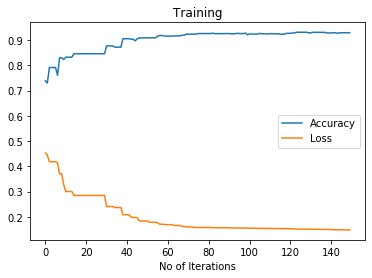

In [33]:
plt.plot(tr_acc,label='Accuracy')
plt.xlabel('No of Iterations')
plt.plot(tr_loss,label='Loss')
plt.legend()
plt.title("Training")
plt.show()

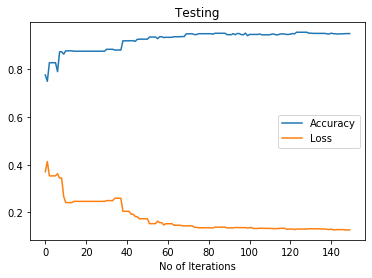

In [46]:
plt.xlabel('No of Iterations')
plt.plot(tst_acc,label='Accuracy')
plt.plot(tst_loss,label='Loss')
plt.legend()
plt.title("Testing")
plt.show()

In [45]:
gbest

array([  4.97068145,  -2.68814875,  -2.28928195,   0.86862162,
         2.85398692,   1.33864996,   3.79240839,  -7.51317275,
        -3.86429077,  -4.31387192,  -4.11028348,   1.5646129 ,
         0.4029814 ,  -0.92741715,   0.85748413,   2.84747029,
         0.04160663,   0.56312397,   1.06214566,   1.53984206,
         0.724875  ,  -2.22347727,  -8.0293366 ,   1.77186317,
        -1.92731939,  -2.20343603,   4.68690343,   0.7726582 ,
         2.92830511,  -1.47057823,   1.15980866,  -4.98607546,
         3.33487488,   1.58834295, -15.32838022,   8.4776463 ,
        10.16347111,   2.89998419,   4.24816663,   3.83446135,
        -2.20423708,   4.3371909 ,  -3.46285   ,  -2.22208246,
         4.01846773,   2.37110802,   6.08027008,   7.35848904,
        -1.0818903 ,   3.91443871,  -7.74464867])

In [19]:
# # 51 parameters loss 0.148 iter 150
# gbest = np.array([  4.97068145,  -2.68814875,  -2.28928195,   0.86862162,
#          2.85398692,   1.33864996,   3.79240839,  -7.51317275,
#         -3.86429077,  -4.31387192,  -4.11028348,   1.5646129 ,
#          0.4029814 ,  -0.92741715,   0.85748413,   2.84747029,
#          0.04160663,   0.56312397,   1.06214566,   1.53984206,
#          0.724875  ,  -2.22347727,  -8.0293366 ,   1.77186317,
#         -1.92731939,  -2.20343603,   4.68690343,   0.7726582 ,
#          2.92830511,  -1.47057823,   1.15980866,  -4.98607546,
#          3.33487488,   1.58834295, -15.32838022,   8.4776463 ,
#         10.16347111,   2.89998419,   4.24816663,   3.83446135,
#         -2.20423708,   4.3371909 ,  -3.46285   ,  -2.22208246,
#          4.01846773,   2.37110802,   6.08027008,   7.35848904,
#         -1.0818903 ,   3.91443871,  -7.74464867])

In [20]:
train_acc,train_loss,test_acc,test_loss = accuracy(gbest,train,train_y,test,test_y)

In [21]:
print('Training Accuracy = '+ str(train_acc * 100) + '%')
print('Training Loss = '+ str(train_loss))

Training Accuracy = 93.41247215221425%
Training Loss = 0.15677628597821397


In [22]:
print('Testing Accuracy = '+ str(test_acc * 100) + '%')
print('Testing Loss = '+ str(test_loss))

Testing Accuracy = 95.23523226973555%
Testing Loss = 0.09491134108212304


In [23]:
W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5 = updatew_s(gbest.reshape(1,gbest.shape[0]))

In [24]:
Y = forwardpass(train,W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5)
loss(Y,train_y)

0.15677628597821397

In [25]:
Y_test = forwardpass(test,W_1,W_2,W_3,W_4,W_5,B_1,B_2,B_3,B_4,B_5)
loss(Y_test,test_y)

0.09491134108212304